In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
path = "C:/Users/David's PC/OneDrive - Grand Canyon University/DSC540/DataSets"
file = "breast-cancer-wisconsin.data"
full_path = path + "/" + file
headers_list = ["id",
                "clump_thickness",
                "uniformity_of_cell_size",
                "uniformity_of_cell_shape",
                "marginal_adhesion",
                "single_epithelial_cell_size",
                "bare_nuclei",
                "bland_chromatin",
                "normal_nucleoli",
                "mitoses",
                "class"]
data = pd.read_csv(full_path,
                   names=headers_list,
                   index_col=headers_list[0])

In [49]:
y = data[['class']]
X_preprocessed = data.loc[:, data.columns != 'class']

In [50]:
## Replacing missing data with 0
X_preprocessed = X.replace('?',
              0)

X_pre_train, X_pre_test, y_pre_train, y_pre_test = train_test_split(X_preprocessed,
                                                                    y,
                                                                    test_size=0.25,
                                                                    random_state=42)

In [51]:
## Using Scikitlearn SelectFromModel to find best features
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_pre_train, np.ravel(y_train))
sel.get_support()
selected_feat = X_pre_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['bland_chromatin'], dtype='object')


In [52]:
X = pd.concat((data[['uniformity_of_cell_size']],
               data[['uniformity_of_cell_shape']],
               data[['bare_nuclei']],
               data[['bland_chromatin']]),
              axis=1)
X = X.replace('?',
              0)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [54]:
error_sqrt = []
error_log2 = []
trees = []

for t in range(1, 300, 10):
    trees.append(t)

## Random Forest Classifiers using sq. rt. as number of features
for i in range(1, 300, 10):
    model = RandomForestClassifier(n_estimators=i,
                                   max_features="sqrt",
                                   criterion="gini").fit(X_train,
                                                         np.ravel(y_train))
    predictions = model.predict(X_test)
    error = 1 - metrics.accuracy_score(y_test, predictions)
    error_sqrt.append(error)

## Random Forest Classifiers using log2 as number of features
for j in range(1, 300, 10):
    model = RandomForestClassifier(n_estimators=j,
                                   max_features="log2",
                                   criterion="gini").fit(X_train,
                                                         np.ravel(y_train))
    predictions = model.predict(X_test)
    error = 1 - metrics.accuracy_score(y_test, predictions)
    error_log2.append(error)

In [55]:
plot_data = pd.DataFrame({"num_of_trees": trees,
                          "error_square_root": error_sqrt,
                          "error_log2": error_log2})

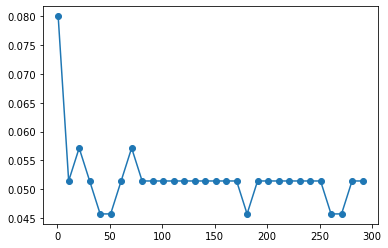

In [56]:
plt.plot(plot_data["num_of_trees"], 
         plot_data['error_square_root'],
         marker='o')
plt.show()

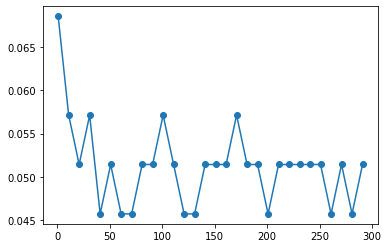

In [57]:
plt.plot(plot_data["num_of_trees"], 
         plot_data['error_log2'],
         marker='o')
plt.show()